#### 0

In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [59]:
np.random.seed(42)

X = np.random.uniform(0, 1, size=(1000,2))
X.shape, X[0:5]

((1000, 2),
 array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615],
        [0.60111501, 0.70807258]]))

In [60]:
epsilon = np.random.normal(0, 1, size=1000)
epsilon.shape

(1000,)

In [61]:
# Terrible solution, but the dataset was terribly formatted to begin with
X1 = np.array([X[i][0] for i in range(len(X))])
X2 = np.array([X[i][1] for i in range(len(X))])

y = 3 * X1 + 5 * X2 + 3 + epsilon
y.shape

(1000,)

In [62]:
X = np.c_[np.ones(len(X)), X]
X[0:3], X.shape

(array([[1.        , 0.37454012, 0.95071431],
        [1.        , 0.73199394, 0.59865848],
        [1.        , 0.15601864, 0.15599452]]),
 (1000, 3))

#### 1 a)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape # X has two columns, so shape is different

((670, 3), (330, 3), (670,), (330,))

In [64]:
y_train = y_train.reshape(-1, 1)

In [98]:
np.random.seed(42)

def gradient_descent(X, y, epochs, learning_rate=0.1):
    m = len(X)
    
    # Create random b0 & b1
    theta = np.random.randn(X.shape[1], 1)  # [beta_0, beta_1]^T - [2x1]
    
    for _ in range(epochs):
        # Get gradient (slope)
        gradient = 2 / m * X.T @ (X @ theta - y) # idk
        
        # determine step size and use it next time we loop
        theta -= learning_rate*gradient # learning_rate is eta in theory
    return theta

# Get estimated b0 and b1 values by actually doing the batch gradient descent
theta = gradient_descent(X_train, y_train, learning_rate=0.1, epochs=1000, )

theta.flatten() # throws away additional dimension

array([3.06440995, 3.03763611, 4.82471763])

In [ ]:
def progress_output(title, theta, steps):

    fig, ax = plt.figure(), plt.axes()
    ax.plot(steps, theta, label = [r"$\beta_0$", r"$\beta_1$", r"$\beta_2$"])
    ax.axhline(y = 3, linestyle="--", label = r"True $\beta_0$")
    ax.axhline(y = 3, linestyle="--", label = r"True $\beta_1$")
    ax.axhline(y = 5, color = "orange", linestyle="--", label = r"True $\beta_2$")
    ax.set(xlabel = "Epochs", ylabel = r"$\theta$ values", title=title)
    ax.legend()

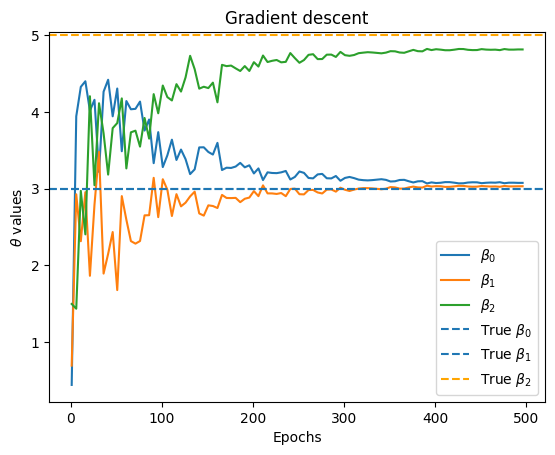

In [183]:
steps = range(1, 500, 5)

theta = [
    gradient_descent(X_train, y_train, epochs, 0.1).flatten() for epochs in steps
]

progress_output('Gradient descent', theta, steps)

#### 1 b/c)

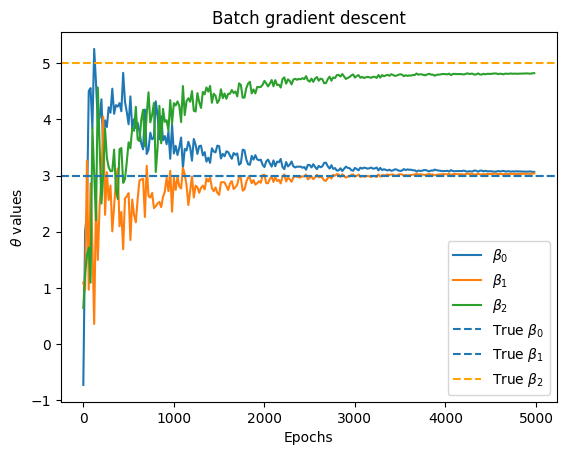

In [192]:
# Gradient descent
steps = range(1, 5000, 20)

theta = [
    gradient_descent(X_train, y_train, epochs, 0.01).flatten() for epochs in steps
]

progress_output('Batch gradient descent', theta, steps)

#### 2 - Stochastic Gradient Descent

In [177]:
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_rate_schedule(t):
    """Decrease learning rate as training progresses"""
    return t0/(t+t1)

def SGD(X, y, epochs):
    theta = np.random.randn(X.shape[1], 1)
    m = len(X)

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            x_i = X[random_index:random_index+1] # this gives an extra dimension on the matrix
            y_i = y[random_index:random_index+1]
            gradients = 2*x_i.T.dot(x_i.dot(theta)-y_i)
            eta = learning_rate_schedule(epoch*m+i)
            theta -= eta*gradients
    
    return theta

SGD(X_train, y_train, 10)


array([[3.10496625],
       [2.99474011],
       [4.78664214]])

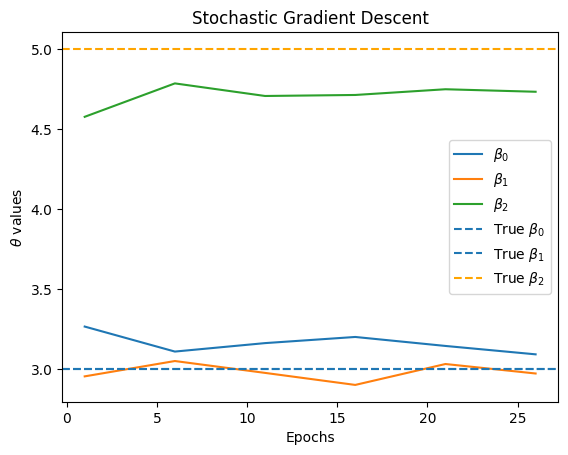

In [178]:
steps = range(1, 30, 5)
    
theta = [
    SGD(X_train, y_train, epochs).flatten() for epochs in steps
]
    
progress_output('Stochastic Gradient Descent',theta, steps)